In [105]:
# import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import balanced_accuracy_score
from collections import Counter
from imblearn.over_sampling import SMOTE

%matplotlib inline

In [104]:
# load data
df = pd.read_excel("Dataset.xlsx")

In [3]:
# look at data
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,AcceptedCmp6,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,0,3,11,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,0,1,0,0,3,11,0,1
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,1,0,0,0,0,3,11,0,1
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,0,3,11,0,0


In [4]:
# remove campaign variables so that response is our only target varaiable
df = df.drop(columns=["AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp6"])

In [5]:
# view data to ensure changes are correct
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,88,3,8,10,4,7,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,6,2,1,1,2,5,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,42,1,8,2,10,4,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,5,2,2,0,4,6,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,15,5,5,3,6,5,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,247,2,9,3,4,5,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,8,7,8,2,5,7,0,3,11,1
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,24,1,2,3,13,6,0,3,11,1
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,61,2,6,5,10,3,0,3,11,0


In [6]:
# Complain, Z_CostContact, and Z_Revenue all have the same value for each record. we will remove those as well
df = df.drop(columns=["Complain", "Z_CostContact", "Z_Revenue"])

In [7]:
# view data to ensure changes are correct
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,546,172,88,88,3,8,10,4,7,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,6,2,1,6,2,1,1,2,5,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,127,111,21,42,1,8,2,10,4,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,20,10,3,5,2,2,0,4,6,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,118,46,27,15,5,5,3,6,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,182,42,118,247,2,9,3,4,5,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,30,0,0,8,7,8,2,5,7,1
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,217,32,12,24,1,2,3,13,6,1
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,214,80,30,61,2,6,5,10,3,0


In [8]:
# drop ID column
df = df.drop(columns="ID")

In [9]:
# view data to ensure changes are correct
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,1
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0
2236,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,1
2237,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,1
2238,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0


In [10]:
# create age column
df['Age'] =  2022 - df['Year_Birth']
# remove Year_Birth column
df = df.drop(columns="Year_Birth")

In [11]:
# view data to ensure changes are correct
df

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Age
0,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,1,65
1,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,68
2,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,57
3,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,38
4,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,55
2236,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,1,76
2237,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,1,41
2238,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,66


In [12]:
# encoding the education 

labels = df['Education'].astype('category').cat.categories.tolist()
edu = {'Education' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(edu)

{'Education': {'2n Cycle': 1, 'Basic': 2, 'Graduation': 3, 'Master': 4, 'PhD': 5}}


In [13]:
df.replace(edu, inplace=True)
display(df['Education'].unique())

array([3, 5, 4, 2, 1])

In [14]:
# view data to ensure changes are correct
df

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Age
0,3,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,1,65
1,3,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,68
2,3,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,57
3,3,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,38
4,5,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,3,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,55
2236,5,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,1,76
2237,3,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,1,41
2238,4,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,66


In [15]:
labels = df['Marital_Status'].astype('category').cat.categories.tolist()
ms = {'Marital_Status' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

df.replace(ms, inplace=True)

In [16]:
# view data to ensure changes are correct
df

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Age
0,3,5,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,1,65
1,3,5,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,68
2,3,6,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,57
3,3,6,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,38
4,5,4,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,3,4,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,55
2236,5,6,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,1,76
2237,3,3,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,1,41
2238,4,6,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,66


In [17]:
# Dt_Customer variable is a date format, this could be more useful if it was an integer representing how long
# a customer has shopped with the company
df.dtypes

Education                       int64
Marital_Status                  int64
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
Response                        int64
Age                             int64
dtype: object

In [18]:
# define the current date used to calculate how long user has been a customer
from datetime import date
currDate = np.datetime64("2022-04-26")

In [19]:
# print current date
currDate

numpy.datetime64('2022-04-26')

In [20]:
# subtract Dt_Customer from currDate to get time delta
delta = currDate - df["Dt_Customer"]

In [21]:
# check data
delta

0      3521 days
1      2971 days
2      3170 days
3      2997 days
4      3019 days
          ...   
2235   3239 days
2236   2877 days
2237   3013 days
2238   3014 days
2239   3480 days
Name: Dt_Customer, Length: 2240, dtype: timedelta64[ns]

In [22]:
# convert to int
delta.dt.days

0       3521
1       2971
2       3170
3       2997
4       3019
        ... 
2235    3239
2236    2877
2237    3013
2238    3014
2239    3480
Name: Dt_Customer, Length: 2240, dtype: int64

In [23]:
# add timedelta to df
df["Days_as_Customer"] = delta.dt.days

In [24]:
# check df
df

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Age,Days_as_Customer
0,3,5,58138.0,0,0,2012-09-04,58,635,88,546,...,88,88,3,8,10,4,7,1,65,3521
1,3,5,46344.0,1,1,2014-03-08,38,11,1,6,...,1,6,2,1,1,2,5,0,68,2971
2,3,6,71613.0,0,0,2013-08-21,26,426,49,127,...,21,42,1,8,2,10,4,0,57,3170
3,3,6,26646.0,1,0,2014-02-10,26,11,4,20,...,3,5,2,2,0,4,6,0,38,2997
4,5,4,58293.0,1,0,2014-01-19,94,173,43,118,...,27,15,5,5,3,6,5,0,41,3019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,3,4,61223.0,0,1,2013-06-13,46,709,43,182,...,118,247,2,9,3,4,5,0,55,3239
2236,5,6,64014.0,2,1,2014-06-10,56,406,0,30,...,0,8,7,8,2,5,7,1,76,2877
2237,3,3,56981.0,0,0,2014-01-25,91,908,48,217,...,12,24,1,2,3,13,6,1,41,3013
2238,4,6,69245.0,0,1,2014-01-24,8,428,30,214,...,30,61,2,6,5,10,3,0,66,3014


In [25]:
# drop Dt_Customer
df = df.drop(columns="Dt_Customer")

In [26]:
# check df
df

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Age,Days_as_Customer
0,3,5,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,1,65,3521
1,3,5,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,68,2971
2,3,6,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,57,3170
3,3,6,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,38,2997
4,5,4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,41,3019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,3,4,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,55,3239
2236,5,6,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,1,76,2877
2237,3,3,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,1,41,3013
2238,4,6,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,66,3014


In [27]:
# look for outliers in income
df.describe()["Income"]

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [28]:
# look for outliers in Days_as_Customer column
df.describe()["Days_as_Customer"]

count    2240.000000
mean     3211.582143
std       202.122512
min      2858.000000
25%      3038.750000
50%      3213.500000
75%      3387.000000
max      3557.000000
Name: Days_as_Customer, dtype: float64

<AxesSubplot:>

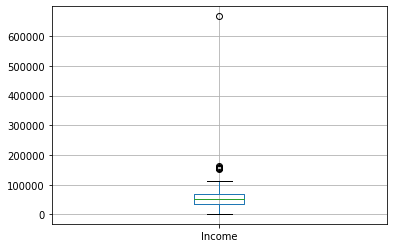

In [29]:
# plot boxplot to visualize potential outliers
df.boxplot(column="Income")

In [30]:
# calculate z scores
from scipy import stats
z_scores = stats.zscore(df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df[filtered_entries]

In [31]:
new_df

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Age,Days_as_Customer


In [32]:
# get location of max income
np.where(df["Income"] == 666666.000000)

(array([2233]),)

In [33]:
# remove extreme outlier
test = df.drop([2233])

In [34]:
# dropped one record so length should be 22239
len(test)

2239

In [35]:
# view new max value
test["Income"].max()

162397.0

<AxesSubplot:>

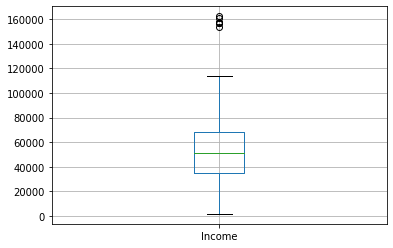

In [36]:
test.boxplot(column="Income")

In [37]:
q1=df["Income"].quantile(0.25)
q3=df["Income"].quantile(0.75)
iqr=q3-q1

In [38]:
# get locations of outliers in Income
np.where(df["Income"] > (q3 + 1.5*iqr))

(array([ 164,  617,  655,  687, 1300, 1653, 2132, 2233]),)

In [39]:
# drop income outlier records
test_df = df.drop([164,  617,  655,  687, 1300, 1653, 2132, 2233])

In [40]:
# check new test_df
test_df

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Age,Days_as_Customer
0,3,5,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,1,65,3521
1,3,5,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,68,2971
2,3,6,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,57,3170
3,3,6,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,38,2997
4,5,4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,41,3019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,3,4,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,55,3239
2236,5,6,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,1,76,2877
2237,3,3,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,1,41,3013
2238,4,6,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,66,3014


<AxesSubplot:>

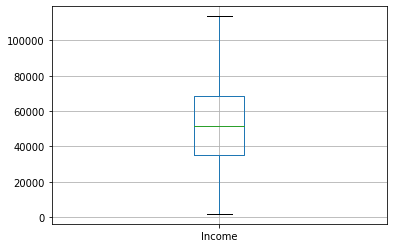

In [41]:
# view income boxplot of new test_df
test_df.boxplot(column="Income")

In [42]:
# wonderful!

In [43]:
# use standard scaler to scale data
#scaler = StandardScaler()
#data_scaled = scaler.fit_transform(test_df)

In [44]:
# get list of column names
column_names = list(test_df.columns)

In [45]:
test_df

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Age,Days_as_Customer
0,3,5,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,1,65,3521
1,3,5,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,68,2971
2,3,6,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,57,3170
3,3,6,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,38,2997
4,5,4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,41,3019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,3,4,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,55,3239
2236,5,6,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,1,76,2877
2237,3,3,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,1,41,3013
2238,4,6,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,66,3014


In [46]:
# split data into data and target data
X = test_df.iloc[:, 0:17]

age = test_df["Age"]
days = test_df["Days_as_Customer"]
X["Age"] = age
X["Days_as_Customer"] = days

T = test_df.iloc[:, -3]

In [47]:
# data
X

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Days_as_Customer
0,3,5,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,65,3521
1,3,5,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,68,2971
2,3,6,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,57,3170
3,3,6,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,38,2997
4,5,4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,41,3019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,3,4,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,55,3239
2236,5,6,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,76,2877
2237,3,3,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,41,3013
2238,4,6,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,66,3014


In [48]:
# target
T

0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    1
2237    1
2238    0
2239    1
Name: Response, Length: 2232, dtype: int64

In [49]:
# now time to create models
# I will use the X and T data above as is for the first observations
# after that I will use pipeline to implement a standard scaler

In [50]:
# split data
X_train, X_test, t_train, t_test = train_test_split(X, T, test_size=0.2)

In [51]:
# logistic regression
#log = LogisticRegression()
#log.fit(X_train, t_train)
#print(f"Test Score: {log.score(X_test, t_test)}")
#print(f"Train Score: {log.score(X_train, t_train)}")

In [52]:
# check for nan values
np.where(np.isnan(test_df))

(array([  10,   27,   43,   48,   58,   71,   90,   91,   92,  128,  133,
         311,  318, 1374, 1377, 1378, 1381, 2053, 2055, 2072, 2073, 2075,
        2078, 2221]),
 array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2]))

In [53]:
# drop nan values
test_dfv2 = test_df.dropna()

In [54]:
test_dfv2

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Age,Days_as_Customer
0,3,5,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,1,65,3521
1,3,5,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,68,2971
2,3,6,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,57,3170
3,3,6,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,38,2997
4,5,4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,41,3019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,3,4,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,55,3239
2236,5,6,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,1,76,2877
2237,3,3,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,1,41,3013
2238,4,6,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,66,3014


In [55]:
# check for nan values
np.where(np.isnan(test_dfv2))

(array([], dtype=int64), array([], dtype=int64))

In [56]:
# split data
X = test_dfv2.iloc[:, 0:17]

age = test_dfv2["Age"]
days = test_dfv2["Days_as_Customer"]
X["Age"] = age
X["Days_as_Customer"] = days

T = test_dfv2.iloc[:, -3]

In [57]:
# explore X
X

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Days_as_Customer
0,3,5,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,65,3521
1,3,5,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,68,2971
2,3,6,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,57,3170
3,3,6,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,38,2997
4,5,4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,41,3019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,3,4,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,55,3239
2236,5,6,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,76,2877
2237,3,3,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,41,3013
2238,4,6,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,66,3014


In [58]:
# explore T
T

0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    1
2237    1
2238    0
2239    1
Name: Response, Length: 2208, dtype: int64

In [59]:
# check nan values
np.where(np.isnan(X))

(array([], dtype=int64), array([], dtype=int64))

In [60]:
# check nan values
np.where(np.isnan(T))

(array([], dtype=int64),)

In [61]:
# split data
X_train, X_test, t_train, t_test = train_test_split(X, T, test_size=0.2)

In [62]:
#logistic regression
log = LogisticRegression()
log.fit(X_train, t_train)
pred = log.predict(X_test)
precision = precision_score(t_test, pred)
recall = recall_score(t_test, pred)
print(f"Test Score: {log.score(X_test, t_test)}")
print(f"Train Score: {log.score(X_train, t_train)}")
print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")
print(f"Balanced Accuracy Score: {balanced_accuracy_score(t_test, pred)}")

Test Score: 0.755656108597285
Train Score: 0.7836919592298981
Precision Score: 0.6285714285714286
Recall Score: 0.3492063492063492
Balanced Accuracy Score: 0.6334639340968455


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [63]:
# naive bayes
nb = GaussianNB()
nb.fit(X_train, t_train)
pred = nb.predict(X_test)
precision = precision_score(t_test, pred)
recall = recall_score(t_test, pred)
print(f"Test Score: {nb.score(X_test, t_test)}")
print(f"Train Score: {nb.score(X_train, t_train)}")
print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")
print(f"Balanced Accuracy Score: {balanced_accuracy_score(t_test, pred)}")

Test Score: 0.6877828054298643
Train Score: 0.711211778029445
Precision Score: 0.4594594594594595
Recall Score: 0.5396825396825397
Balanced Accuracy Score: 0.6432589913602571


In [64]:
# SGD classifier
sgd = SGDClassifier()
sgd.fit(X_train, t_train)
pred = sgd.predict(X_test)
precision = precision_score(t_test, pred)
recall = recall_score(t_test, pred)
print(f"Test Score: {sgd.score(X_test, t_test)}")
print(f"Train Score: {sgd.score(X_train, t_train)}")
print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")
print(f"Balanced Accuracy Score: {balanced_accuracy_score(t_test, pred)}")

Test Score: 0.7149321266968326
Train Score: 0.7281993204983013
Precision Score: 0.0
Recall Score: 0.0
Balanced Accuracy Score: 0.5


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
# ridge regression
ridge = RidgeClassifier()
ridge.fit(X_train, t_train)
pred = ridge.predict(X_test)
precision = precision_score(t_test, pred)
recall = recall_score(t_test, pred)
print(f"Test Score: {ridge.score(X_test, t_test)}")
print(f"Train Score: {ridge.score(X_train, t_train)}")
print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")
print(f"Balanced Accuracy Score: {balanced_accuracy_score(t_test, pred)}")

Test Score: 0.7828054298642534
Train Score: 0.7967157417893544
Precision Score: 0.7142857142857143
Recall Score: 0.3968253968253968
Balanced Accuracy Score: 0.6667671287924453


In [66]:
# svc
svc = SVC(kernel='rbf', tol=1e-3, random_state=0)
svc.fit(X_train, t_train)
pred = svc.predict(X_test)
precision = precision_score(t_test, pred)
recall = recall_score(t_test, pred)
print(f"Test Score: {svc.score(X_test, t_test)}")
print(f"Train Score: {svc.score(X_train, t_train)}")
print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")
print(f"Balanced Accuracy Score: {balanced_accuracy_score(t_test, pred)}")

Test Score: 0.753393665158371
Train Score: 0.7661381653454133
Precision Score: 0.7741935483870968
Recall Score: 0.19047619047619047
Balanced Accuracy Score: 0.5841621458710067


In [67]:
# logistic regression with standard scaler
clf = Pipeline([('scaler', StandardScaler()), 
                ('classifier', LogisticRegression(random_state=0))])
clf.fit(X_train, t_train)
pred = clf.predict(X_test)
precision = precision_score(t_test, pred)
recall = recall_score(t_test, pred)
print(f"Test Score: {clf.score(X_test, t_test)}")
print(f"Train Score: {clf.score(X_train, t_train)}")
print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")
print(f"Balanced Accuracy Score: {balanced_accuracy_score(t_test, pred)}")

Test Score: 0.7782805429864253
Train Score: 0.7938844847112118
Precision Score: 0.6842105263157895
Recall Score: 0.4126984126984127
Balanced Accuracy Score: 0.6683745228049025


In [68]:
# naive bayes with standard scaler
clf = Pipeline([('scaler', StandardScaler()), 
                ('classifier', GaussianNB())])
clf.fit(X_train, t_train)
pred = clf.predict(X_test)
precision = precision_score(t_test, pred)
recall = recall_score(t_test, pred)
print(f"Test Score: {clf.score(X_test, t_test)}")
print(f"Train Score: {clf.score(X_train, t_train)}")
print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")
print(f"Balanced Accuracy Score: {balanced_accuracy_score(t_test, pred)}")

Test Score: 0.6877828054298643
Train Score: 0.7055492638731596
Precision Score: 0.46
Recall Score: 0.5476190476190477
Balanced Accuracy Score: 0.6456449668474985


In [69]:
# sgd with standard scaler
clf = Pipeline([('scaler', StandardScaler()), 
                ('classifier', SGDClassifier())])
clf.fit(X_train, t_train)
pred = clf.predict(X_test)
precision = precision_score(t_test, pred)
recall = recall_score(t_test, pred)
print(f"Test Score: {clf.score(X_test, t_test)}")
print(f"Train Score: {clf.score(X_train, t_train)}")
print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")
print(f"Balanced Accuracy Score: {balanced_accuracy_score(t_test, pred)}")

Test Score: 0.755656108597285
Train Score: 0.7593431483578709
Precision Score: 0.6071428571428571
Recall Score: 0.40476190476190477
Balanced Accuracy Score: 0.6501657625075347


In [70]:
# ridge with standard scaler
clf = Pipeline([('scaler', StandardScaler()), 
                ('classifier', RidgeClassifier())])
clf.fit(X_train, t_train)
pred = clf.predict(X_test)
precision = precision_score(t_test, pred)
recall = recall_score(t_test, pred)
print(f"Test Score: {clf.score(X_test, t_test)}")
print(f"Train Score: {clf.score(X_train, t_train)}")
print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")
print(f"Balanced Accuracy Score: {balanced_accuracy_score(t_test, pred)}")

Test Score: 0.7828054298642534
Train Score: 0.7967157417893544
Precision Score: 0.7142857142857143
Recall Score: 0.3968253968253968
Balanced Accuracy Score: 0.6667671287924453


In [71]:
# svc with standard scaler
clf = Pipeline([('scaler', StandardScaler()), 
                ('classifier', SVC(kernel='rbf', tol=1e-3, random_state=0))])
clf.fit(X_train, t_train)
pred = clf.predict(X_test)
precision = precision_score(t_test, pred)
recall = recall_score(t_test, pred)
print(f"Test Score: {clf.score(X_test, t_test)}")
print(f"Train Score: {clf.score(X_train, t_train)}")
print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")
print(f"Balanced Accuracy Score: {balanced_accuracy_score(t_test, pred)}")

Test Score: 0.7941176470588235
Train Score: 0.8527746319365799
Precision Score: 0.7692307692307693
Recall Score: 0.3968253968253968
Balanced Accuracy Score: 0.6746785211975085


In [72]:
# perform chi2 test
from sklearn.feature_selection import chi2
scores, pvalues = chi2(X, T)
pvalues

array([3.52486832e-002, 9.29230600e-001, 0.00000000e+000, 2.20625346e-010,
       3.32972735e-006, 2.83398763e-088, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       6.65286246e-002, 4.86413228e-044, 6.31210038e-154, 1.13394274e-020,
       3.73886803e-004, 1.33321401e-002, 3.94109264e-046])

In [73]:
X

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Days_as_Customer
0,3,5,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,65,3521
1,3,5,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,68,2971
2,3,6,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,57,3170
3,3,6,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,38,2997
4,5,4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,41,3019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,3,4,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,55,3239
2236,5,6,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,76,2877
2237,3,3,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,41,3013
2238,4,6,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,66,3014


In [74]:
# columns to remove:
# Marital_Status

In [75]:
X = X.drop(columns="Marital_Status")

In [76]:
X

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Days_as_Customer
0,3,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,65,3521
1,3,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,68,2971
2,3,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,57,3170
3,3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,38,2997
4,5,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,41,3019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,3,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,55,3239
2236,5,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,76,2877
2237,3,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,41,3013
2238,4,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,66,3014


In [77]:
# recreate models with new X
# split data
X_train, X_test, t_train, t_test = train_test_split(X, T, test_size=0.2)

In [78]:
#logistic regression
log = LogisticRegression()
log.fit(X_train, t_train)
pred = log.predict(X_test)
precision = precision_score(t_test, pred)
recall = recall_score(t_test, pred)
print(f"Test Score: {log.score(X_test, t_test)}")
print(f"Train Score: {log.score(X_train, t_train)}")
print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")
print(f"Balanced Accuracy Score: {balanced_accuracy_score(t_test, pred)}")

Test Score: 0.7828054298642534
Train Score: 0.7734994337485843
Precision Score: 0.5573770491803278
Recall Score: 0.3300970873786408
Balanced Accuracy Score: 0.6252255348397628


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [79]:
# naive bayes
nb = GaussianNB()
nb.fit(X_train, t_train)
pred = nb.predict(X_test)
precision = precision_score(t_test, pred)
recall = recall_score(t_test, pred)
print(f"Test Score: {nb.score(X_test, t_test)}")
print(f"Train Score: {nb.score(X_train, t_train)}")
print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")
print(f"Balanced Accuracy Score: {balanced_accuracy_score(t_test, pred)}")

Test Score: 0.6968325791855203
Train Score: 0.7066817667044167
Precision Score: 0.38686131386861317
Recall Score: 0.5145631067961165
Balanced Accuracy Score: 0.6333877480883237


In [80]:
# SGD classifier
sgd = SGDClassifier()
sgd.fit(X_train, t_train)
pred = sgd.predict(X_test)
precision = precision_score(t_test, pred)
recall = recall_score(t_test, pred)
print(f"Test Score: {sgd.score(X_test, t_test)}")
print(f"Train Score: {sgd.score(X_train, t_train)}")
print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")
print(f"Balanced Accuracy Score: {balanced_accuracy_score(t_test, pred)}")

Test Score: 0.6923076923076923
Train Score: 0.7219705549263873
Precision Score: 0.3935483870967742
Recall Score: 0.5922330097087378
Balanced Accuracy Score: 0.6574734370077613


In [81]:
# ridge regression
ridge = RidgeClassifier()
ridge.fit(X_train, t_train)
pred = ridge.predict(X_test)
precision = precision_score(t_test, pred)
recall = recall_score(t_test, pred)
print(f"Test Score: {ridge.score(X_test, t_test)}")
print(f"Train Score: {ridge.score(X_train, t_train)}")
print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")
print(f"Balanced Accuracy Score: {balanced_accuracy_score(t_test, pred)}")

Test Score: 0.7895927601809954
Train Score: 0.7938844847112118
Precision Score: 0.5735294117647058
Recall Score: 0.3786407766990291
Balanced Accuracy Score: 0.6465475269925824


In [82]:
# svc
svc = SVC(kernel='rbf', tol=1e-3, random_state=0)
svc.fit(X_train, t_train)
pred = svc.predict(X_test)
precision = precision_score(t_test, pred)
recall = recall_score(t_test, pred)
print(f"Test Score: {svc.score(X_test, t_test)}")
print(f"Train Score: {svc.score(X_train, t_train)}")
print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")
print(f"Balanced Accuracy Score: {balanced_accuracy_score(t_test, pred)}")

Test Score: 0.7963800904977375
Train Score: 0.7553793884484711
Precision Score: 0.6857142857142857
Recall Score: 0.23300970873786409
Balanced Accuracy Score: 0.6002806655783716


In [83]:
# logistic regression with standard scaler
clf = Pipeline([('scaler', StandardScaler()), 
                ('classifier', LogisticRegression(random_state=0))])
clf.fit(X_train, t_train)
pred = clf.predict(X_test)
precision = precision_score(t_test, pred)
recall = recall_score(t_test, pred)
print(f"Test Score: {clf.score(X_test, t_test)}")
print(f"Train Score: {clf.score(X_train, t_train)}")
print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")
print(f"Balanced Accuracy Score: {balanced_accuracy_score(t_test, pred)}")

Test Score: 0.7918552036199095
Train Score: 0.7944507361268404
Precision Score: 0.5774647887323944
Recall Score: 0.39805825242718446
Balanced Accuracy Score: 0.6547813386029727


In [84]:
# naive bayes with standard scaler
clf = Pipeline([('scaler', StandardScaler()), 
                ('classifier', GaussianNB())])
clf.fit(X_train, t_train)
pred = clf.predict(X_test)
precision = precision_score(t_test, pred)
recall = recall_score(t_test, pred)
print(f"Test Score: {clf.score(X_test, t_test)}")
print(f"Train Score: {clf.score(X_train, t_train)}")
print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")
print(f"Balanced Accuracy Score: {balanced_accuracy_score(t_test, pred)}")

Test Score: 0.6877828054298643
Train Score: 0.702718006795017
Precision Score: 0.3776223776223776
Recall Score: 0.5242718446601942
Balanced Accuracy Score: 0.630867485751926


In [85]:
# sgd with standard scaler
clf = Pipeline([('scaler', StandardScaler()), 
                ('classifier', SGDClassifier())])
clf.fit(X_train, t_train)
pred = clf.predict(X_test)
precision = precision_score(t_test, pred)
recall = recall_score(t_test, pred)
print(f"Test Score: {clf.score(X_test, t_test)}")
print(f"Train Score: {clf.score(X_train, t_train)}")
print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")
print(f"Balanced Accuracy Score: {balanced_accuracy_score(t_test, pred)}")

Test Score: 0.7420814479638009
Train Score: 0.7627406568516422
Precision Score: 0.45045045045045046
Recall Score: 0.4854368932038835
Balanced Accuracy Score: 0.6527479451270155


In [86]:
# ridge with standard scaler
clf = Pipeline([('scaler', StandardScaler()), 
                ('classifier', RidgeClassifier())])
clf.fit(X_train, t_train)
pred = clf.predict(X_test)
precision = precision_score(t_test, pred)
recall = recall_score(t_test, pred)
print(f"Test Score: {clf.score(X_test, t_test)}")
print(f"Train Score: {clf.score(X_train, t_train)}")
print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")
print(f"Balanced Accuracy Score: {balanced_accuracy_score(t_test, pred)}")

Test Score: 0.7895927601809954
Train Score: 0.7933182332955833
Precision Score: 0.5735294117647058
Recall Score: 0.3786407766990291
Balanced Accuracy Score: 0.6465475269925824


In [87]:
# svc with standard scaler
clf = Pipeline([('scaler', StandardScaler()), 
                ('classifier', SVC(kernel='rbf', tol=1e-3, random_state=0))])
clf.fit(X_train, t_train)
pred = clf.predict(X_test)
precision = precision_score(t_test, pred)
recall = recall_score(t_test, pred)
print(f"Test Score: {clf.score(X_test, t_test)}")
print(f"Train Score: {clf.score(X_train, t_train)}")
print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")
print(f"Balanced Accuracy Score: {balanced_accuracy_score(t_test, pred)}")

Test Score: 0.7963800904977375
Train Score: 0.8442808607021518
Precision Score: 0.6065573770491803
Recall Score: 0.3592233009708738
Balanced Accuracy Score: 0.6442134203969413


In [88]:
# check skewness of X
X.skew()

Education             -0.280799
Income                 0.012991
Kidhome                0.635704
Teenhome               0.405100
Recency               -0.000418
MntWines               1.166125
MntFruits              2.096335
MntMeatProducts        1.816630
MntFishProducts        1.911132
MntSweetProducts       2.098118
MntGoldProds           1.835298
NumDealsPurchases      2.314023
NumWebPurchases        1.202432
NumCatalogPurchases    1.367322
NumStorePurchases      0.708356
NumWebVisitsMonth      0.230273
Age                    0.350065
Days_as_Customer      -0.017714
dtype: float64

In [89]:
# that actually isn't terrible

In [90]:
# apply log transformation on data
X_log = np.log(X+1)
X_log.skew()

Education             -1.137002
Income                -1.305970
Kidhome                0.422333
Teenhome               0.177400
Recency               -1.555611
MntWines              -0.555540
MntFruits              0.074981
MntMeatProducts       -0.094981
MntFishProducts       -0.059708
MntSweetProducts       0.076007
MntGoldProds          -0.352768
NumDealsPurchases      0.671836
NumWebPurchases       -0.258135
NumCatalogPurchases    0.103674
NumStorePurchases     -0.051085
NumWebVisitsMonth     -0.970647
Age                   -0.268870
Days_as_Customer      -0.093512
dtype: float64

In [91]:
# recreate models with X_log data

In [92]:
# split data
X_train, X_test, t_train, t_test = train_test_split(X_log, T, test_size=0.2)

In [93]:
#logistic regression
log = LogisticRegression()
log.fit(X_train, t_train)
pred = log.predict(X_test)
precision = precision_score(t_test, pred)
recall = recall_score(t_test, pred)
print(f"Test Score: {log.score(X_test, t_test)}")
print(f"Train Score: {log.score(X_train, t_train)}")
print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")
print(f"Balanced Accuracy Score: {balanced_accuracy_score(t_test, pred)}")

Test Score: 0.7601809954751131
Train Score: 0.7785956964892412
Precision Score: 0.6956521739130435
Recall Score: 0.3609022556390977
Balanced Accuracy Score: 0.646470545295277


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [94]:
# naive bayes
nb = GaussianNB()
nb.fit(X_train, t_train)
pred = nb.predict(X_test)
precision = precision_score(t_test, pred)
recall = recall_score(t_test, pred)
print(f"Test Score: {nb.score(X_test, t_test)}")
print(f"Train Score: {nb.score(X_train, t_train)}")
print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")
print(f"Balanced Accuracy Score: {balanced_accuracy_score(t_test, pred)}")

Test Score: 0.6855203619909502
Train Score: 0.6342015855039638
Precision Score: 0.484375
Recall Score: 0.6992481203007519
Balanced Accuracy Score: 0.6894298853930945


In [95]:
# SGD classifier
sgd = SGDClassifier()
sgd.fit(X_train, t_train)
pred = sgd.predict(X_test)
precision = precision_score(t_test, pred)
recall = recall_score(t_test, pred)
print(f"Test Score: {sgd.score(X_test, t_test)}")
print(f"Train Score: {sgd.score(X_train, t_train)}")
print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")
print(f"Balanced Accuracy Score: {balanced_accuracy_score(t_test, pred)}")

Test Score: 0.7013574660633484
Train Score: 0.7389580973952435
Precision Score: 0.6666666666666666
Recall Score: 0.015037593984962405
Balanced Accuracy Score: 0.5059006740151349


In [96]:
# ridge regression
ridge = RidgeClassifier()
ridge.fit(X_train, t_train)
pred = ridge.predict(X_test)
precision = precision_score(t_test, pred)
recall = recall_score(t_test, pred)
print(f"Test Score: {ridge.score(X_test, t_test)}")
print(f"Train Score: {ridge.score(X_train, t_train)}")
print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")
print(f"Balanced Accuracy Score: {balanced_accuracy_score(t_test, pred)}")

Test Score: 0.7420814479638009
Train Score: 0.7819932049830125
Precision Score: 0.6666666666666666
Recall Score: 0.2857142857142857
Balanced Accuracy Score: 0.6121128062875636


In [97]:
# svc
svc = SVC(kernel='rbf', tol=1e-3, random_state=0)
svc.fit(X_train, t_train)
pred = svc.predict(X_test)
precision = precision_score(t_test, pred)
recall = recall_score(t_test, pred)
print(f"Test Score: {svc.score(X_test, t_test)}")
print(f"Train Score: {svc.score(X_train, t_train)}")
print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")
print(f"Balanced Accuracy Score: {balanced_accuracy_score(t_test, pred)}")

Test Score: 0.7081447963800905
Train Score: 0.7378255945639864
Precision Score: 1.0
Recall Score: 0.03007518796992481
Balanced Accuracy Score: 0.5150375939849624


In [98]:
# logistic regression with standard scaler
clf = Pipeline([('scaler', StandardScaler()), 
                ('classifier', LogisticRegression(random_state=0))])
clf.fit(X_train, t_train)
pred = clf.predict(X_test)
precision = precision_score(t_test, pred)
recall = recall_score(t_test, pred)
print(f"Test Score: {clf.score(X_test, t_test)}")
print(f"Train Score: {clf.score(X_train, t_train)}")
print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")
print(f"Balanced Accuracy Score: {balanced_accuracy_score(t_test, pred)}")

Test Score: 0.755656108597285
Train Score: 0.7718006795016987
Precision Score: 0.676056338028169
Recall Score: 0.3609022556390977
Balanced Accuracy Score: 0.6432342993405844


In [99]:
# naive bayes with standard scaler
clf = Pipeline([('scaler', StandardScaler()), 
                ('classifier', GaussianNB())])
clf.fit(X_train, t_train)
pred = clf.predict(X_test)
precision = precision_score(t_test, pred)
recall = recall_score(t_test, pred)
print(f"Test Score: {clf.score(X_test, t_test)}")
print(f"Train Score: {clf.score(X_train, t_train)}")
print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")
print(f"Balanced Accuracy Score: {balanced_accuracy_score(t_test, pred)}")

Test Score: 0.6855203619909502
Train Score: 0.6342015855039638
Precision Score: 0.484375
Recall Score: 0.6992481203007519
Balanced Accuracy Score: 0.6894298853930945


In [100]:
# sgd with standard scaler
clf = Pipeline([('scaler', StandardScaler()), 
                ('classifier', SGDClassifier())])
clf.fit(X_train, t_train)
pred = clf.predict(X_test)
precision = precision_score(t_test, pred)
recall = recall_score(t_test, pred)
print(f"Test Score: {clf.score(X_test, t_test)}")
print(f"Train Score: {clf.score(X_train, t_train)}")
print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")
print(f"Balanced Accuracy Score: {balanced_accuracy_score(t_test, pred)}")

Test Score: 0.7036199095022625
Train Score: 0.7366930917327293
Precision Score: 0.5102040816326531
Recall Score: 0.37593984962406013
Balanced Accuracy Score: 0.6103000218994087


In [101]:
# ridge with standard scaler
clf = Pipeline([('scaler', StandardScaler()), 
                ('classifier', RidgeClassifier())])
clf.fit(X_train, t_train)
pred = clf.predict(X_test)
precision = precision_score(t_test, pred)
recall = recall_score(t_test, pred)
print(f"Test Score: {clf.score(X_test, t_test)}")
print(f"Train Score: {clf.score(X_train, t_train)}")
print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")
print(f"Balanced Accuracy Score: {balanced_accuracy_score(t_test, pred)}")

Test Score: 0.7420814479638009
Train Score: 0.7819932049830125
Precision Score: 0.6610169491525424
Recall Score: 0.2932330827067669
Balanced Accuracy Score: 0.6142540818064579


In [102]:
# svc with standard scaler
clf = Pipeline([('scaler', StandardScaler()), 
                ('classifier', SVC(kernel='rbf', tol=1e-3, random_state=0))])
clf.fit(X_train, t_train)
pred = clf.predict(X_test)
precision = precision_score(t_test, pred)
recall = recall_score(t_test, pred)
print(f"Test Score: {clf.score(X_test, t_test)}")
print(f"Train Score: {clf.score(X_train, t_train)}")
print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")
print(f"Balanced Accuracy Score: {balanced_accuracy_score(t_test, pred)}")

Test Score: 0.7692307692307693
Train Score: 0.8369195922989807
Precision Score: 0.7183098591549296
Recall Score: 0.38345864661654133
Balanced Accuracy Score: 0.6593668637613451
